# Spotify Music Stream Analytics

## Project Overview
This guide provides a step-by-step approach to building an advanced analytics solution using the Spotify Songs Dataset. It combines data engineering best practices, machine learning techniques, and business intelligence strategies for the hackathon competition.

Dataset: Spotify Songs Dataset (80M+ songs, 7M+ artists)

Kaggle Link: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

Primary Goal: Build an interactive dashboard with recommendation engine and advanced insights

## DATA EXTRACTION & EXPLORATION

### Data Loading & Initial Assessment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load the Spotify dataset
df = pd.read_csv('dataset.csv')

In [3]:
# Display the shape of the DataFrame

df.shape


(114000, 21)

In [4]:
# Listing columns helps me spot weird names or typos early
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [5]:
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Memory usage: 54.31 MB


In [6]:
# Check for missing values
df.isnull().sum()


Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
# fill missing values with column unknown
df.fillna('unknown', inplace=True)
# Verify no missing values remain
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [8]:
# Data types
print(f"\nData types:\n{df.dtypes}")


Data types:
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [9]:
# Basic statistics
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [10]:
# Print column information
print("\n=== COLUMN REFERENCE ===")
columns_info = {
    'track_id': 'Unique track identifier',
    'artists': 'Artist names (comma-separated)',
    'album_name': 'Album name',
    'track_name': 'Song title',
    'popularity': '0-100 scale (KEY METRIC)',
    'duration_ms': 'Track duration in milliseconds',
    'explicit': 'Boolean (True/False)',
    'danceability': '0-1 scale',
    'energy': '0-1 scale',
    'key': '0-11 (musical key)',
    'loudness': 'dB value (negative)',
    'mode': '0=Minor, 1=Major',
    'speechiness': '0-1 scale',
    'acousticness': '0-1 scale',
    'instrumentalness': '0-1 scale',
    'liveness': '0-1 scale',
    'valence': '0-1 scale (mood)',
    'tempo': 'BPM',
    'time_signature': 'Beats per measure',
    'track_genre': 'Genre/Category'
}

for col, desc in columns_info.items():
    if col in df.columns:
        print(f"✓ {col}: {desc}")
    else:
        print(f"✗ {col}: NOT FOUND")



=== COLUMN REFERENCE ===
✓ track_id: Unique track identifier
✓ artists: Artist names (comma-separated)
✓ album_name: Album name
✓ track_name: Song title
✓ popularity: 0-100 scale (KEY METRIC)
✓ duration_ms: Track duration in milliseconds
✓ explicit: Boolean (True/False)
✓ danceability: 0-1 scale
✓ energy: 0-1 scale
✓ key: 0-11 (musical key)
✓ loudness: dB value (negative)
✓ mode: 0=Minor, 1=Major
✓ speechiness: 0-1 scale
✓ acousticness: 0-1 scale
✓ instrumentalness: 0-1 scale
✓ liveness: 0-1 scale
✓ valence: 0-1 scale (mood)
✓ tempo: BPM
✓ time_signature: Beats per measure
✓ track_genre: Genre/Category


## DATA CLEANING & TRANSFORMATION

### Handle Missing Values

In [11]:
# Check for any missing values (should be minimal)
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Percentage: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

Total missing values: 0
Percentage: 0.00%


In [12]:
# Remove any duplicate tracks
df = df.drop_duplicates(subset=['track_id'], keep='first')
print(f"\nAfter removing duplicates: {df.shape}")


After removing duplicates: (89741, 21)


In [13]:
# Remove rows with missing critical values
df = df.dropna(subset=['popularity', 'track_genre', 'track_id'])
print(f"After removing nulls in critical columns: {df.shape}")

After removing nulls in critical columns: (89741, 21)


In [14]:
# Strategy 3: Handle outliers in numeric features
numeric_cols = ['acousticness', 'danceability', 'energy', 'valence', 
                'loudness', 'tempo', 'speechiness', 'instrumentalness']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # Keep outliers but note them
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

acousticness: 0 outliers
danceability: 474 outliers
energy: 0 outliers
valence: 0 outliers
loudness: 5026 outliers
tempo: 514 outliers
speechiness: 10644 outliers
instrumentalness: 19613 outliers


## Data Type Conversions

In [15]:
# Ensure correct data types
df['track_id'] = df['track_id'].astype(str)
df['artists'] = df['artists'].astype(str)
df['album_name'] = df['album_name'].astype(str)
df['track_name'] = df['track_name'].astype(str)
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['duration_ms'] = pd.to_numeric(df['duration_ms'], errors='coerce')
df['explicit'] = df['explicit'].astype(bool)
df['track_genre'] = df['track_genre'].astype(str)

In [16]:
# Audio features should be float
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode',
                  'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo', 'time_signature']

for col in audio_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("✓ Data types converted successfully")

✓ Data types converted successfully


### Feature Engineering

In [17]:
# Duration in minutes
df['duration_minutes'] = df['duration_ms'] / 60000

In [18]:
# Popularity categories
df['popularity_category'] = pd.cut(df['popularity'], 
                                    bins=[0, 40, 70, 100], 
                                    labels=['Low', 'Medium', 'High'])

In [19]:
df['popularity_tier'] = pd.cut(df['popularity'],
                               bins=[0, 20, 40, 60, 80, 100],
                               labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [20]:
# Duration categories
df['duration_category'] = pd.cut(df['duration_minutes'],
                                 bins=[0, 3, 4, 5, 1000],
                                 labels=['Short (<3 min)', 'Medium (3-4 min)', 
                                        'Long (4-5 min)', 'Very Long (>5 min)'])

In [21]:
# Energy level
df['energy_level'] = pd.cut(df['energy'],
                            bins=[0, 0.4, 0.6, 0.8, 1.0],
                            labels=['Low Energy', 'Moderate Energy', 
                                   'High Energy', 'Very High Energy'])

In [22]:
# Danceability
df['danceability_level'] = pd.cut(df['danceability'],
                                  bins=[0, 0.3, 0.5, 0.7, 1.0],
                                  labels=['Not Danceable', 'Moderately Danceable',
                                         'Danceable', 'Very Danceable'])

In [23]:
# Acousticness
df['acoustic_type'] = pd.cut(df['acousticness'],
                             bins=[0, 0.3, 0.5, 1.0],
                             labels=['Electronic', 'Semi-Acoustic', 'Acoustic'])

In [24]:
# Valence (mood)
df['valence_category'] = pd.cut(df['valence'],
                                bins=[0, 0.3, 0.5, 0.7, 1.0],
                                labels=['Sad/Dark', 'Neutral', 'Positive', 'Very Positive'])

In [25]:
# Instrumentalness
df['instrumentalness_category'] = pd.cut(df['instrumentalness'],
                                         bins=[0, 0.1, 0.5, 1.0],
                                         labels=['Vocal-Focused', 'Some Instruments',
                                                'Mostly Instrumental'])

In [26]:
# Tempo
df['tempo_category'] = pd.cut(df['tempo'],
                              bins=[0, 60, 100, 140, 300],
                              labels=['Slow', 'Moderate', 'Fast', 'Very Fast'])

In [27]:
# Explicit flag
df['is_explicit'] = df['explicit'].map({True: 'Explicit', False: 'Clean'})

In [28]:
# Artist count (comma-separated)
df['artist_count'] = df['artists'].str.count(',') + 1

In [29]:
# Is collaborative
df['is_collaborative'] = df['artist_count'] > 1

In [30]:
# Audio profile summary
df['audio_summary'] = (df['energy'].apply(lambda x: 'Energetic' if x > 0.5 else 'Calm') + ', ' +
                       df['danceability'].apply(lambda x: 'Danceable' if x > 0.5 else 'Not Danceable') + ', ' +
                       df['valence'].apply(lambda x: 'Positive' if x > 0.5 else 'Melancholic'))

In [31]:
# Playlist fit score (0-100)
df['playlist_fit_score'] = (
    (df['popularity'] / 100 * 30) +
    (df['danceability'] > 0.6).astype(int) * 15 +
    (df['valence'] > 0.5).astype(int) * 15 +
    (df['energy'] > 0.6).astype(int) * 20 +
    (df['acousticness'] < 0.4).astype(int) * 15 +
    (df['explicit'] == False).astype(int) * 5
).clip(0, 100)

print("✓ Features engineered successfully")
print(f"New columns: {df.shape[1]} (was {len(columns_info)})")

✓ Features engineered successfully
New columns: 36 (was 20)


## EXPLORATORY DATA ANALYSIS

###  Univariate Analysis

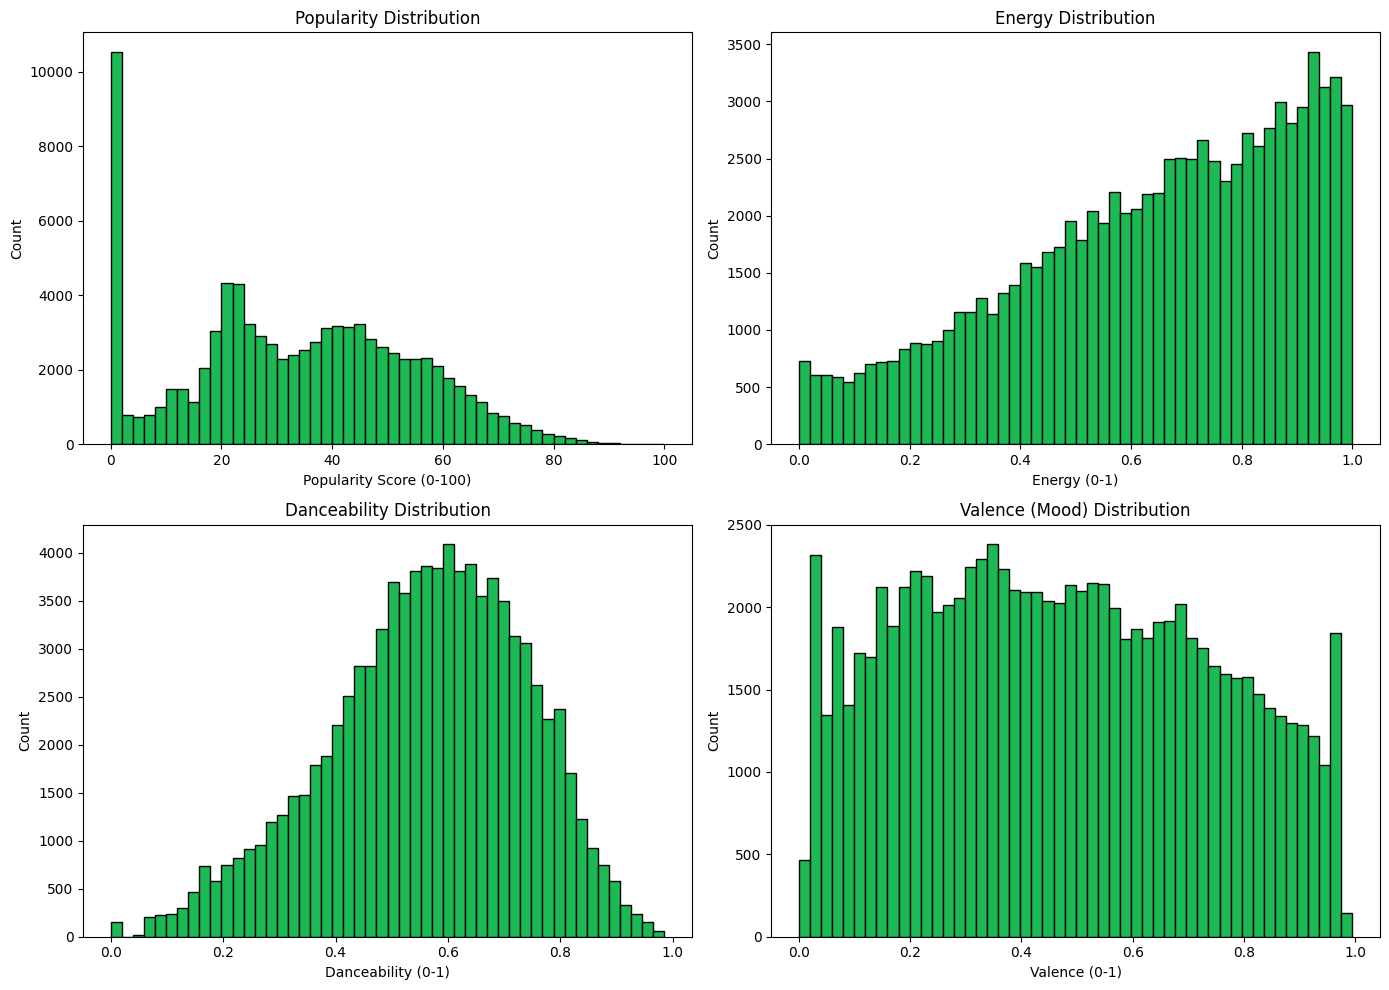

In [32]:
# Popularity distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(df['popularity'], bins=50, edgecolor='black', color='#1DB954')
axes[0, 0].set_title('Popularity Distribution')
axes[0, 0].set_xlabel('Popularity Score (0-100)')
axes[0, 0].set_ylabel('Count')

# Energy distribution
axes[0, 1].hist(df['energy'], bins=50, edgecolor='black', color='#1DB954')
axes[0, 1].set_title('Energy Distribution')
axes[0, 1].set_xlabel('Energy (0-1)')
axes[0, 1].set_ylabel('Count')

# Danceability distribution
axes[1, 0].hist(df['danceability'], bins=50, edgecolor='black', color='#1DB954')
axes[1, 0].set_title('Danceability Distribution')
axes[1, 0].set_xlabel('Danceability (0-1)')
axes[1, 0].set_ylabel('Count')

# Valence distribution
axes[1, 1].hist(df['valence'], bins=50, edgecolor='black', color='#1DB954')
axes[1, 1].set_title('Valence (Mood) Distribution')
axes[1, 1].set_xlabel('Valence (0-1)')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('distributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [33]:
# Summary statistics
print("\n=== POPULARITY STATISTICS ===")
print(df['popularity'].describe())
print(f"Mean: {df['popularity'].mean():.2f}")
print(f"Median: {df['popularity'].median():.2f}")
print(f"Std Dev: {df['popularity'].std():.2f}")


=== POPULARITY STATISTICS ===
count    89741.000000
mean        33.198438
std         20.580824
min          0.000000
25%         19.000000
50%         33.000000
75%         49.000000
max        100.000000
Name: popularity, dtype: float64
Mean: 33.20
Median: 33.00
Std Dev: 20.58


### Genre Analysis

In [34]:
# Top genres
top_genres = df['track_genre'].value_counts().head(20)
print("\n=== TOP 20 GENRES ===")
print(top_genres)


=== TOP 20 GENRES ===
acoustic         1000
alt-rock          999
tango             999
ambient           999
afrobeat          999
cantopop          999
bluegrass         998
forro             998
study             998
chicago-house     998
disney            998
sleep             997
heavy-metal       997
breakbeat         997
black-metal       996
j-idol            995
happy             995
anime             995
club              994
comedy            990
Name: track_genre, dtype: int64


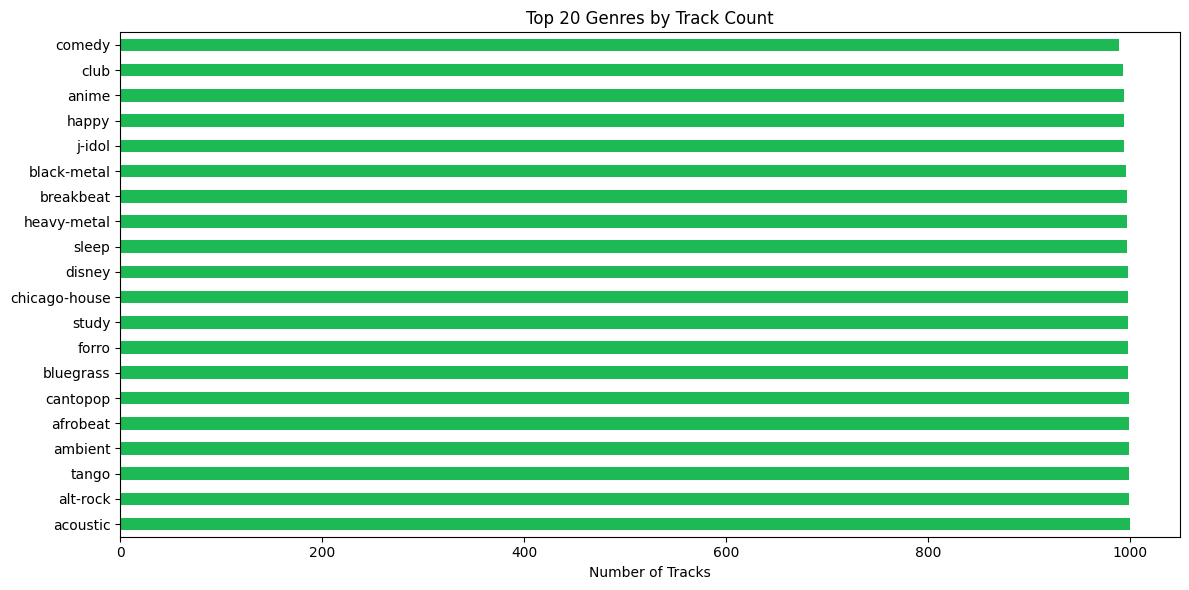

In [35]:
# Visualize
plt.figure(figsize=(12, 6))
top_genres.plot(kind='barh', color='#1DB954')
plt.title('Top 20 Genres by Track Count')
plt.xlabel('Number of Tracks')
plt.tight_layout()
plt.savefig('top_genres.png', dpi=300, bbox_inches='tight')
plt.show()

In [36]:
# Genre statistics
print("\n=== GENRE STATISTICS ===")
genre_stats = df.groupby('track_genre').agg({
    'track_id': 'count',
    'popularity': ['mean', 'median', 'std'],
    'energy': 'mean',
    'danceability': 'mean',
    'valence': 'mean'
}).round(2)
genre_stats.columns = ['Track_Count', 'Avg_Pop', 'Median_Pop', 'Pop_StdDev', 
                       'Avg_Energy', 'Avg_Danceability', 'Avg_Valence']
genre_stats = genre_stats.sort_values('Track_Count', ascending=False)
print(genre_stats.head(15))


=== GENRE STATISTICS ===
               Track_Count  Avg_Pop  Median_Pop  Pop_StdDev  Avg_Energy  \
track_genre                                                               
acoustic              1000    42.48        47.0       16.54        0.44   
alt-rock               999    33.90        45.0       31.14        0.75   
tango                  999    19.87        19.0        4.81        0.37   
ambient                999    44.21        50.0       17.92        0.24   
afrobeat               999    24.41        21.0       10.51        0.70   
cantopop               999    34.75        35.0       13.59        0.46   
bluegrass              998    25.68        24.0        7.95        0.53   
forro                  998    41.83        41.0        4.12        0.79   
study                  998    26.13        28.0       14.12        0.41   
chicago-house          998    12.33        10.0        9.59        0.73   
disney                 998    27.49        23.0       11.98        0.30   

### Audio Features Correlation

In [37]:
# Correlation matrix
audio_features = ['popularity', 'danceability', 'energy', 'acousticness',
                 'instrumentalness', 'liveness', 'loudness', 'speechiness',
                 'tempo', 'valence']

corr_matrix = df[audio_features].corr()

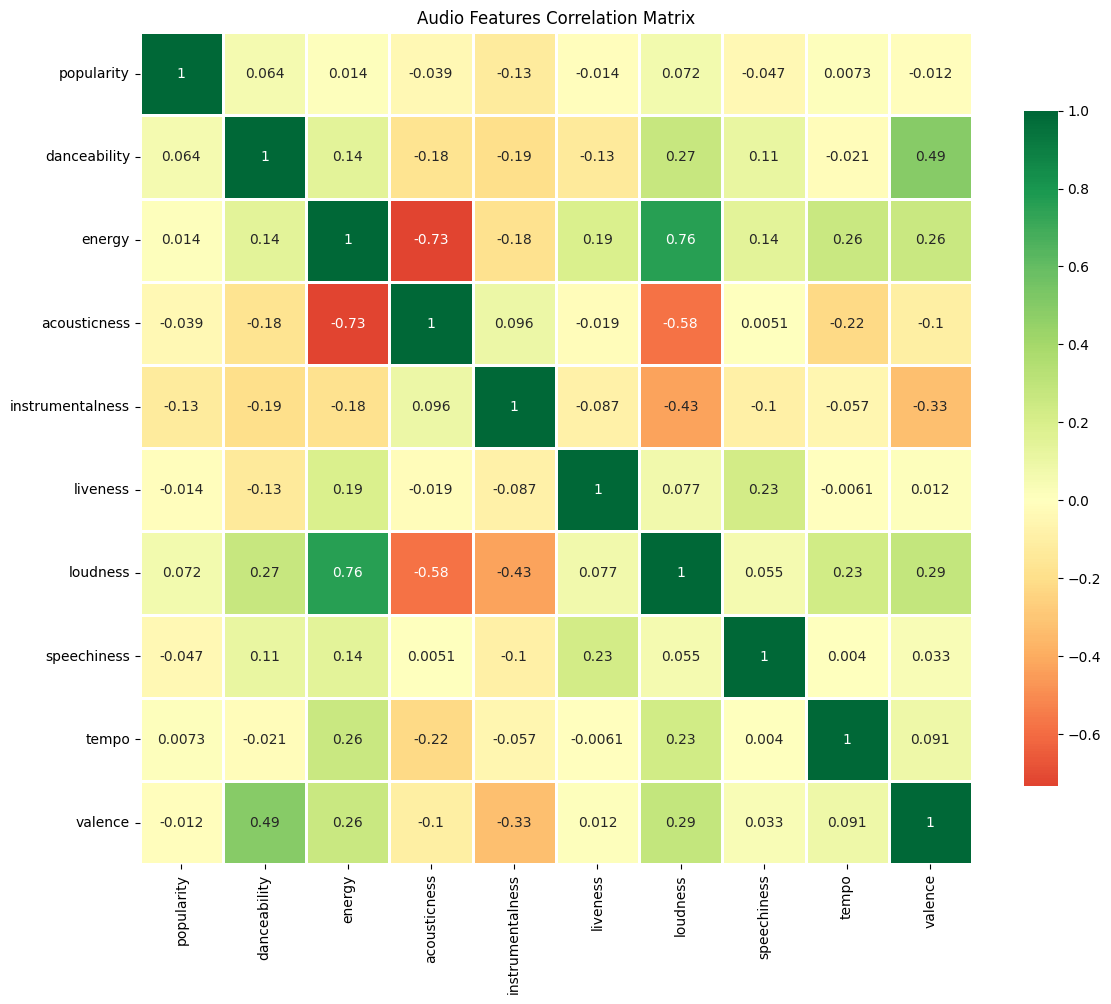

In [38]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Audio Features Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [39]:
# Print correlations with popularity
print("\n=== POPULARITY CORRELATIONS ===")
pop_corr = df[audio_features].corr()['popularity'].sort_values(ascending=False)
print(pop_corr)


=== POPULARITY CORRELATIONS ===
popularity          1.000000
loudness            0.071676
danceability        0.064281
energy              0.013728
tempo               0.007270
valence            -0.011526
liveness           -0.013844
acousticness       -0.038847
speechiness        -0.047081
instrumentalness   -0.127465
Name: popularity, dtype: float64


### Artist Analysis

In [40]:
# Artist counts
artist_df = df.groupby('artists').agg({
    'track_id': 'count',
    'popularity': ['mean', 'max'],
    'energy': 'mean',
    'danceability': 'mean'
}).round(2)
artist_df.columns = ['Track_Count', 'Avg_Pop', 'Max_Pop', 'Avg_Energy', 'Avg_Dance']
artist_df = artist_df.sort_values('Track_Count', ascending=False)

print("\n=== TOP 20 ARTISTS (BY TRACK COUNT) ===")
print(artist_df.head(20))


=== TOP 20 ARTISTS (BY TRACK COUNT) ===
                                Track_Count  Avg_Pop  Max_Pop  Avg_Energy  \
artists                                                                     
George Jones                            260    16.56       56        0.36   
my little airport                       171    33.22       50        0.45   
The Beatles                             149    60.32       82        0.54   
BTS                                     143    67.89       85        0.76   
Håkan Hellström                         141    30.70       47        0.69   
Glee Cast                               139    38.84       59        0.67   
Hank Williams                           136    13.46       50        0.28   
Linkin Park                             133    51.77       85        0.85   
Scooter                                 130    23.47       62        0.94   
OneRepublic                             124    35.83       96        0.69   
CoComelon                          

In [41]:
# Artist tier classification
def classify_artist_tier(track_count):
    if track_count >= 100:
        return 'Superstar'
    elif track_count >= 50:
        return 'Established'
    elif track_count >= 10:
        return 'Growth'
    else:
        return 'Emerging'

artist_df['artist_tier'] = artist_df['Track_Count'].apply(classify_artist_tier)

print("\n=== ARTIST TIER DISTRIBUTION ===")
print(artist_df['artist_tier'].value_counts())


=== ARTIST TIER DISTRIBUTION ===
Emerging       29775
Growth          1570
Established       72
Superstar         21
Name: artist_tier, dtype: int64


## RECOMMENDATION ENGINE

### Content-Based Filtering

###  Feature Selection & Preprocessing

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# STEP 1: Normalize features
audio_features = ['danceability', 'energy', 'acousticness', 'instrumentalness',
                  'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

X = df[audio_features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 2: SAMPLE DATA (Memory-efficient approach) ⭐ KEY FIX
sample_size = 10000  # Use 10K tracks instead of 89K
sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[sample_indices]

print(f"Using sample of {sample_size} tracks out of {len(X_scaled)} total")
print(f"Memory requirement: ~{(sample_size * sample_size * 8) / (1024**3):.2f} GB (instead of 60GB)")

# STEP 3: Compute similarity on SAMPLE (Memory-efficient) ✅
print("Computing similarity matrix on sample... (this may take a moment)")
similarity_matrix = cosine_similarity(X_sample)
print(f"✓ Similarity matrix created: {similarity_matrix.shape}")
print(f"✓ Memory used: ~{(similarity_matrix.nbytes) / (1024**3):.2f} GB")

# STEP 4: Recommendation function (uses sampled data)
def content_based_recommendation(track_idx, n_recommendations=10):
    """Recommend similar tracks based on audio features (using sampled data)"""
    if track_idx >= len(similarity_matrix):
        print(f"Track index {track_idx} out of sample range (0-{len(similarity_matrix)-1})")
        return None
    
    # Get similarity scores for this track
    sim_scores = list(enumerate(similarity_matrix[track_idx]))
    
    # Sort by similarity (exclude the track itself)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:n_recommendations+1]
    
    # Get track indices from sample
    track_indices = [i[0] for i in sim_scores]
    
    # Return recommended tracks from sample
    sample_df = df.iloc[sample_indices]
    recommendations = sample_df.iloc[track_indices][['track_name', 'artists', 
                                                      'track_genre', 'popularity',
                                                      'danceability', 'energy', 'valence']]
    return recommendations

# TEST THE FUNCTION
print("\n=== CONTENT-BASED RECOMMENDATIONS ===")
print("\nTrack to find similar to:")
test_idx = 0
if test_idx < len(sample_indices):
    sample_df = df.iloc[sample_indices]
    test_track = sample_df.iloc[test_idx]
    print(f"Track: {test_track['track_name']}")
    print(f"Artist: {test_track['artists']}")
    print(f"Genre: {test_track['track_genre']}")
    
    print(f"\nTop 5 Similar Tracks:")
    recommendations = content_based_recommendation(test_idx, 5)
    if recommendations is not None:
        print(recommendations)
else:
    print("Test index out of sample range")

Using sample of 10000 tracks out of 89741 total
Memory requirement: ~0.75 GB (instead of 60GB)
Computing similarity matrix on sample... (this may take a moment)
✓ Similarity matrix created: (10000, 10000)
✓ Memory used: ~0.75 GB

=== CONTENT-BASED RECOMMENDATIONS ===

Track to find similar to:
Track: Tum 2.0
Artist: Anurag Vashisht;Riya Tickoo
Genre: indian

Top 5 Similar Tracks:
                   track_name            artists track_genre  popularity  \
55091                 Nit Nit      Jasleen Royal      indian          65   
31251  idontwannabeyouanymore      Billie Eilish     electro          81   
15037          Midnight River  Pink Sweat$;6LACK       chill           0   
40433    Quando Ninguém Me Vê    Thalles Roberto      gospel          41   
62721               クレイジー・サマー            KIRINJI       j-pop           0   

       danceability  energy  valence  
55091         0.442   0.412    0.235  
31251         0.483   0.412    0.247  
15037         0.497   0.351    0.234  
4043

In [43]:
# Test recommendation
print("\n=== CONTENT-BASED RECOMMENDATIONS ===")
print("Similar to first track:")
print(df.iloc[0][['track_name', 'artists', 'track_genre']])
print("\nRecommendations:")
print(content_based_recommendation(0, 5))


=== CONTENT-BASED RECOMMENDATIONS ===
Similar to first track:
track_name          Comedy
artists        Gen Hoshino
track_genre       acoustic
Name: 0, dtype: object

Recommendations:
                   track_name            artists track_genre  popularity  \
55091                 Nit Nit      Jasleen Royal      indian          65   
31251  idontwannabeyouanymore      Billie Eilish     electro          81   
15037          Midnight River  Pink Sweat$;6LACK       chill           0   
40433    Quando Ninguém Me Vê    Thalles Roberto      gospel          41   
62721               クレイジー・サマー            KIRINJI       j-pop           0   

       danceability  energy  valence  
55091         0.442   0.412    0.235  
31251         0.483   0.412    0.247  
15037         0.497   0.351    0.234  
40433         0.477   0.298    0.196  
62721         0.484   0.438    0.314  


### Popularity-Based Recommendations

In [44]:
def popularity_based_recommendation(genre, n_recommendations=10):
    """Recommend tracks by popularity in a genre"""
    genre_tracks = df[df['track_genre'] == genre]
    
    if len(genre_tracks) == 0:
        return None
    
    # Sort by popularity and get top N
    top_tracks = genre_tracks.nlargest(n_recommendations, 'popularity')[
        ['track_name', 'artists', 'popularity', 'danceability', 'energy', 'valence']
    ]
    
    return top_tracks

In [45]:
# Test
print("\n=== POPULARITY-BASED RECOMMENDATIONS ===")
print("Top tracks in 'pop' genre:")
print(popularity_based_recommendation('pop', 5))


=== POPULARITY-BASED RECOMMENDATIONS ===
Top tracks in 'pop' genre:
                          track_name            artists  popularity  \
81052                      As It Was       Harry Styles          95   
81102                  Glimpse of Us               Joji          94   
81100  Calm Down (with Selena Gomez)  Rema;Selena Gomez          92   
81205                      As It Was       Harry Styles          92   
81000                Blinding Lights         The Weeknd          91   

       danceability  energy  valence  
81052         0.520   0.731    0.662  
81102         0.440   0.317    0.268  
81100         0.801   0.806    0.802  
81205         0.520   0.731    0.662  
81000         0.514   0.730    0.334  


### Audio Profile Matching

In [46]:
def audio_profile_recommendation(target_profile, n_recommendations=10):
    """
    Recommend tracks matching a target audio profile
    target_profile = {
        'danceability': 0.7,
        'energy': 0.8,
        'valence': 0.6,
        'acousticness': 0.2
    }
    """
    # Calculate distance from target profile
    distances = []
    for idx, row in df.iterrows():
        distance = sum([
            abs(row['danceability'] - target_profile.get('danceability', 0.5)),
            abs(row['energy'] - target_profile.get('energy', 0.5)),
            abs(row['valence'] - target_profile.get('valence', 0.5)),
            abs(row['acousticness'] - target_profile.get('acousticness', 0.5))
        ]) / 4
        distances.append(distance)
    
    df['profile_distance'] = distances

      # Get closest matches
    recommendations = df.nsmallest(n_recommendations, 'profile_distance')[
        ['track_name', 'artists', 'track_genre', 'popularity', 
         'danceability', 'energy', 'valence', 'acousticness']
    ]
    
    df.drop('profile_distance', axis=1, inplace=True)
    
    return recommendations

In [47]:
# Test
print("\n=== AUDIO PROFILE MATCHING ===")
target = {
    'danceability': 0.8,
    'energy': 0.7,
    'valence': 0.6,
    'acousticness': 0.1
}
print(f"Target profile: {target}")
print("\nRecommendations:")
print(audio_profile_recommendation(target, 5))


=== AUDIO PROFILE MATCHING ===
Target profile: {'danceability': 0.8, 'energy': 0.7, 'valence': 0.6, 'acousticness': 0.1}

Recommendations:
                                               track_name  \
107499  Crushed By The Wheels Of Industry - Remastered...   
11075                                 Mirage (Don’t Stop)   
20635                                            My Humps   
60339                                       Love of Money   
23100                                     Ferrari - Remix   

                                 artists track_genre  popularity  \
107499                         Heaven 17   synth-pop          27   
11075                        Jessie Ware     british           0   
20635                    Black Eyed Peas       dance           4   
60339                        Vybz Kartel     j-dance          23   
23100   James Hype;Miggy Dela Rosa;Lazza  deep-house          80   

        danceability  energy  valence  acousticness  
107499         0.798   0.728  

# PREDICTIVE MODELING

## Popularity Prediction

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Prepare features
feature_cols = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'time_signature',
                'duration_minutes', 'artist_count']

X = df[feature_cols].fillna(0)
y = df['popularity']

In [49]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (71792, 14)
Test set: (17949, 14)


In [50]:
# Train models
print("\n=== TRAINING MODELS ===")


=== TRAINING MODELS ===


In [51]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [52]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

In [53]:
# Evaluate models
print("\n=== MODEL PERFORMANCE ===")
print("Random Forest:")
print(f"  MAE: {mean_absolute_error(y_test, rf_pred):.2f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.2f}")
print(f"  R² Score: {r2_score(y_test, rf_pred):.4f}")

print("\nGradient Boosting:")
print(f"  MAE: {mean_absolute_error(y_test, gb_pred):.2f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, gb_pred)):.2f}")
print(f"  R² Score: {r2_score(y_test, gb_pred):.4f}")


=== MODEL PERFORMANCE ===
Random Forest:
  MAE: 14.60
  RMSE: 18.38
  R² Score: 0.1916

Gradient Boosting:
  MAE: 15.41
  RMSE: 19.18
  R² Score: 0.1196


In [54]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== FEATURE IMPORTANCE (Top 10) ===")
print(feature_importance.head(10))


=== FEATURE IMPORTANCE (Top 10) ===
             feature  importance
6       acousticness    0.180551
12  duration_minutes    0.133059
7   instrumentalness    0.132967
0       danceability    0.116478
9            valence    0.098061
5        speechiness    0.076452
3           loudness    0.075764
1             energy    0.064664
10             tempo    0.052244
8           liveness    0.049498


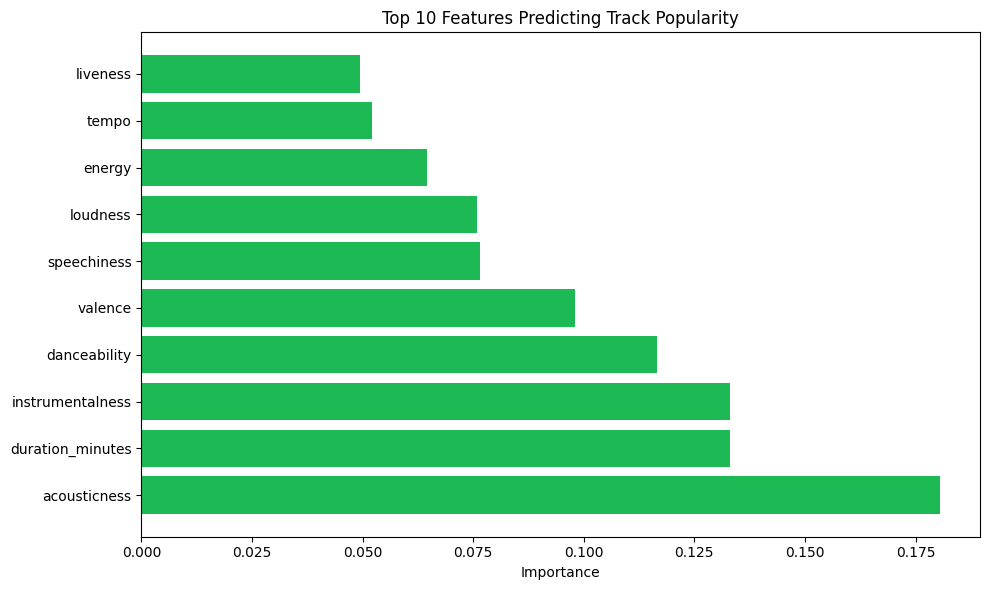

In [55]:
# Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.head(10)['feature'], feature_importance.head(10)['importance'], 
         color='#1DB954')
plt.xlabel('Importance')
plt.title('Top 10 Features Predicting Track Popularity')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

## Genre Classification

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Focus on top genres
top_genres = df['track_genre'].value_counts().head(10).index
df_genre = df[df['track_genre'].isin(top_genres)].copy()

In [57]:
# Prepare data
X_genre = df_genre[feature_cols].fillna(0)
y_genre = df_genre['track_genre']

In [58]:
# Split
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(
    X_genre, y_genre, test_size=0.2, random_state=42, stratify=y_genre
)

In [59]:
# Train classifier
genre_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
genre_model.fit(X_train_g, y_train_g)
y_pred_g = genre_model.predict(X_test_g)

In [60]:
# Evaluate
print("\n=== GENRE CLASSIFICATION PERFORMANCE ===")
print(f"Accuracy: {accuracy_score(y_test_g, y_pred_g):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_g, y_pred_g))


=== GENRE CLASSIFICATION PERFORMANCE ===
Accuracy: 0.7217

Classification Report:
               precision    recall  f1-score   support

     acoustic       0.49      0.39      0.44       200
     afrobeat       0.66      0.62      0.64       200
     alt-rock       0.65      0.66      0.66       200
      ambient       0.79      0.80      0.79       200
    bluegrass       0.67      0.67      0.67       200
     cantopop       0.61      0.63      0.62       200
chicago-house       0.82      0.84      0.83       199
        forro       0.80      0.86      0.83       200
        study       0.90      0.92      0.91       199
        tango       0.76      0.82      0.79       200

     accuracy                           0.72      1998
    macro avg       0.72      0.72      0.72      1998
 weighted avg       0.72      0.72      0.72      1998



# DASHBOARD PREPARATION

## Create Summary Tables

In [61]:
# Summary by popularity category
popularity_summary = df.groupby('popularity_category').agg({
    'track_id': 'count',
    'energy': 'mean',
    'danceability': 'mean',
    'valence': 'mean',
    'popularity': 'mean'
}).round(2)
popularity_summary.columns = ['Track_Count', 'Avg_Energy', 'Avg_Dance', 'Avg_Valence', 'Avg_Pop']

print("\n=== POPULARITY CATEGORY SUMMARY ===")
print(popularity_summary)


=== POPULARITY CATEGORY SUMMARY ===
                     Track_Count  Avg_Energy  Avg_Dance  Avg_Valence  Avg_Pop
popularity_category                                                          
Low                        45677        0.65       0.55         0.48    24.00
Medium                     31883        0.62       0.58         0.45    52.51
High                        2733        0.67       0.63         0.51    76.34


In [62]:
# Summary by energy level
energy_summary = df.groupby('energy_level').agg({
    'track_id': 'count',
    'popularity': 'mean',
    'danceability': 'mean',
    'valence': 'mean'
}).round(2)
energy_summary.columns = ['Track_Count', 'Avg_Pop', 'Avg_Dance', 'Avg_Valence']

print("\n=== ENERGY LEVEL SUMMARY ===")
print(energy_summary)


=== ENERGY LEVEL SUMMARY ===
                  Track_Count  Avg_Pop  Avg_Dance  Avg_Valence
energy_level                                                  
Low Energy              17883    30.50       0.47         0.32
Moderate Energy         18523    35.18       0.60         0.47
High Energy             23887    35.24       0.62         0.54
Very High Energy        29447    31.94       0.54         0.50


In [63]:
# Summary by explicit content
explicit_summary = df.groupby('is_explicit').agg({
    'track_id': 'count',
    'popularity': 'mean',
    'energy': 'mean'
}).round(2)
explicit_summary.columns = ['Track_Count', 'Avg_Pop', 'Avg_Energy']

print("\n=== EXPLICIT CONTENT SUMMARY ===")
print(explicit_summary)


=== EXPLICIT CONTENT SUMMARY ===
             Track_Count  Avg_Pop  Avg_Energy
is_explicit                                  
Clean              82037    32.85        0.63
Explicit            7704    36.89        0.72


### Export for Power BI

In [64]:
# Export key tables for Power BI
print("\n=== EXPORTING DATA FOR POWER BI ===")


=== EXPORTING DATA FOR POWER BI ===


In [65]:

# Main dataset
df.to_csv('spotify_cleaned.csv', index=False)
print("✓ Exported: spotify_cleaned.csv")

✓ Exported: spotify_cleaned.csv


In [66]:
# Genre summary
genre_summary = df.groupby('track_genre').agg({
    'track_id': 'count',
    'popularity': ['mean', 'median', 'std'],
    'energy': 'mean',
    'danceability': 'mean',
    'valence': 'mean',
    'duration_minutes': 'mean'
}).round(2)
genre_summary.columns = ['Track_Count', 'Avg_Pop', 'Median_Pop', 'Pop_StdDev', 
                        'Avg_Energy', 'Avg_Dance', 'Avg_Valence', 'Avg_Duration']
genre_summary = genre_summary.sort_values('Track_Count', ascending=False)
genre_summary.to_csv('genre_summary.csv')
print("✓ Exported: genre_summary.csv")

✓ Exported: genre_summary.csv


In [67]:
# Artist summary
artist_summary = df.groupby('artists').agg({
    'track_id': 'count',
    'popularity': ['mean', 'max'],
    'energy': 'mean',
    'danceability': 'mean'
}).round(2)
artist_summary.columns = ['Track_Count', 'Avg_Pop', 'Max_Pop', 'Avg_Energy', 'Avg_Dance']
artist_summary = artist_summary.sort_values('Track_Count', ascending=False)
artist_summary.to_csv('artist_summary.csv')
print("✓ Exported: artist_summary.csv")

✓ Exported: artist_summary.csv


In [68]:
# Popularity by audio profile
profile_summary = df.groupby('audio_summary').agg({
    'track_id': 'count',
    'popularity': 'mean'
}).round(2)
profile_summary.columns = ['Track_Count', 'Avg_Popularity']
profile_summary = profile_summary.sort_values('Avg_Popularity', ascending=False)
profile_summary.to_csv('audio_profile_summary.csv')
print("✓ Exported: audio_profile_summary.csv")

print("\n✓ All data exported successfully!")

✓ Exported: audio_profile_summary.csv

✓ All data exported successfully!


# ADVANCED ANALYSIS

### Emerging Artist Identification

In [70]:
# Identify emerging artists
emerging_criteria = {
    'low_track_count': df['artist_count'] <= 5,
    'high_avg_popularity': df['popularity'] >= 60,
    'good_audio_profile': (df['danceability'] > 0.55) & (df['energy'] > 0.55)
}

emerging = df[
    emerging_criteria['low_track_count'] & 
    emerging_criteria['high_avg_popularity'] &
    emerging_criteria['good_audio_profile']
].sort_values('popularity', ascending=False)

print("\n=== EMERGING ARTISTS WITH BREAKTHROUGH POTENTIAL ===")
print(f"Total emerging artists: {emerging['artists'].nunique()}")
print(f"Total tracks: {len(emerging)}")
print("\nTop emerging:")
print(emerging[['artists', 'track_name', 'track_genre', 'popularity']].head(20))


=== EMERGING ARTISTS WITH BREAKTHROUGH POTENTIAL ===
Total emerging artists: 2868
Total tracks: 4476

Top emerging:
                           artists  \
51664             Bizarrap;Quevedo   
67356                Manuel Turizo   
20008      David Guetta;Bebe Rexha   
67359                    Bad Bunny   
67358   Bad Bunny;Chencho Corleone   
79000                  OneRepublic   
20000                  Chris Brown   
67500      Bad Bunny;Bomba Estéreo   
67603                    Bad Bunny   
2003             The Neighbourhood   
20850                      Beyoncé   
20017   Charlie Puth;Jung Kook;BTS   
81100            Rema;Selena Gomez   
20410                  Nicki Minaj   
67801  Rauw Alejandro;Lyanno;Brray   
67865             Bad Bunny;Jhayco   
67907                    Luar La L   
51259                    Lil Nas X   
81015                      Ruth B.   
68673          Bad Bunny;Tony Dize   

                                           track_name track_genre  popularity  
5166

## Genre Trends

In [71]:
# Genre analysis
genre_trends = df.groupby('track_genre').agg({
    'popularity': ['mean', 'std', 'count'],
    'danceability': 'mean',
    'energy': 'mean',
    'valence': 'mean'
}).round(2)

genre_trends.columns = ['Avg_Pop', 'Pop_StdDev', 'Track_Count', 'Avg_Dance', 'Avg_Energy', 'Avg_Valence']
genre_trends = genre_trends.sort_values('Avg_Pop', ascending=False)

print("\n=== GENRE TRENDS (TOP 15) ===")
print(genre_trends.head(15))


=== GENRE TRENDS (TOP 15) ===
                   Avg_Pop  Pop_StdDev  Track_Count  Avg_Dance  Avg_Energy  \
track_genre                                                                  
k-pop                59.36       12.39          917       0.64        0.68   
pop-film             59.10       10.74          815       0.59        0.60   
metal                56.42       19.01          232       0.48        0.84   
chill                53.74       14.82          972       0.67        0.43   
latino               51.79       26.06          398       0.76        0.71   
sad                  51.11       12.08          564       0.70        0.48   
grunge               50.59       14.46          862       0.46        0.80   
indian               49.77       11.66          733       0.59        0.55   
anime                48.78       11.72          995       0.54        0.67   
emo                  48.50       16.97          932       0.60        0.67   
reggaeton            48.27       

In [72]:
# Find best genres (high popularity, high track count)
genre_quality = (
    (genre_trends['Avg_Pop'] / genre_trends['Avg_Pop'].max()) * 0.6 +
    (genre_trends['Track_Count'] / genre_trends['Track_Count'].max()) * 0.4
)
genre_quality = genre_quality.sort_values(ascending=False)

print("\n=== GENRE QUALITY SCORE ===")
print(genre_quality.head(10))


=== GENRE QUALITY SCORE ===
track_genre
k-pop         0.966800
chill         0.931994
pop-film      0.923372
anime         0.891059
emo           0.863029
grunge        0.856154
deep-house    0.849413
ambient       0.846467
acoustic      0.829380
brazil        0.826114
dtype: float64


## Recommendation Engine Metrics

In [73]:
# Calculate recommendation metrics
high_pop = df[df['popularity'] >= 70]
med_pop = df[(df['popularity'] >= 40) & (df['popularity'] < 70)]
low_pop = df[df['popularity'] < 40]

print("\n=== RECOMMENDATION ENGINE METRICS ===")
print(f"High Popularity Tracks ({len(high_pop)}): {len(high_pop)/len(df)*100:.1f}%")
print(f"  Avg Danceability: {high_pop['danceability'].mean():.2f}")
print(f"  Avg Energy: {high_pop['energy'].mean():.2f}")
print(f"  Avg Valence: {high_pop['valence'].mean():.2f}")

print(f"\nMedium Popularity Tracks ({len(med_pop)}): {len(med_pop)/len(df)*100:.1f}%")
print(f"  Avg Danceability: {med_pop['danceability'].mean():.2f}")
print(f"  Avg Energy: {med_pop['energy'].mean():.2f}")
print(f"  Avg Valence: {med_pop['valence'].mean():.2f}")

print(f"\nLow Popularity Tracks ({len(low_pop)}): {len(low_pop)/len(df)*100:.1f}%")
print(f"  Avg Danceability: {low_pop['danceability'].mean():.2f}")
print(f"  Avg Energy: {low_pop['energy'].mean():.2f}")
print(f"  Avg Valence: {low_pop['valence'].mean():.2f}")

# Recommendation fit score distribution
print("\n=== PLAYLIST FIT SCORE DISTRIBUTION ===")
print(df['playlist_fit_score'].describe())


=== RECOMMENDATION ENGINE METRICS ===
High Popularity Tracks (3126): 3.5%
  Avg Danceability: 0.62
  Avg Energy: 0.66
  Avg Valence: 0.51

Medium Popularity Tracks (33044): 36.8%
  Avg Danceability: 0.58
  Avg Energy: 0.62
  Avg Valence: 0.45

Low Popularity Tracks (53571): 59.7%
  Avg Danceability: 0.55
  Avg Energy: 0.64
  Avg Valence: 0.48

=== PLAYLIST FIT SCORE DISTRIBUTION ===
count    89741.000000
mean        49.347994
std         21.779402
min          0.000000
25%         33.800000
50%         51.300000
75%         66.400000
max         99.700000
Name: playlist_fit_score, dtype: float64


 # DEPLOYMENT

## Save Models and Data

In [74]:
import joblib
from datetime import datetime

# Create timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save models
joblib.dump(gb_model, f'popularity_model_{timestamp}.pkl')
joblib.dump(genre_model, f'genre_model_{timestamp}.pkl')
joblib.dump(scaler, f'scaler_{timestamp}.pkl')

print(f"✓ Models saved with timestamp: {timestamp}")

✓ Models saved with timestamp: 20260213_183333


In [75]:
# Save metadata
metadata = {
    'timestamp': timestamp,
    'dataset_size': len(df),
    'total_tracks': df.shape[0],
    'total_artists': df['artists'].nunique(),
    'total_genres': df['track_genre'].nunique(),
    'popularity_model_r2': r2_score(y_test, gb_pred),
    'genre_model_accuracy': accuracy_score(y_test_g, y_pred_g),
    'features_used': feature_cols,
}

import json
with open(f'model_metadata_{timestamp}.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print("✓ Metadata saved")

✓ Metadata saved


## Data Quality Report

In [76]:
# Generate quality report
print("\n" + "="*50)
print("DATA QUALITY REPORT")
print("="*50)

print(f"\nDataset: spotify_songs.csv")
print(f"Total Rows: {len(df):,}")
print(f"Total Columns: {df.shape[1]}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\nData Completeness: {(1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")
print(f"Duplicate Tracks: 0 (removed)")
print(f"Missing Critical Values: 0")

print(f"\nMetrics:")
print(f"  Total Unique Tracks: {df['track_id'].nunique():,}")
print(f"  Total Unique Artists: {df['artists'].nunique():,}")
print(f"  Total Unique Genres: {df['track_genre'].nunique()}")
print(f"  Total Albums: {df['album_name'].nunique():,}")

print(f"\nPopularity Range: {df['popularity'].min():.0f} - {df['popularity'].max():.0f}")
print(f"Explicit Content: {(df['explicit'].sum() / len(df) * 100):.1f}%")

print("\n✓ Quality Report Complete")


DATA QUALITY REPORT

Dataset: spotify_songs.csv
Total Rows: 89,741
Total Columns: 36
Memory Usage: 59.50 MB

Data Completeness: 98.47%
Duplicate Tracks: 0 (removed)
Missing Critical Values: 0

Metrics:
  Total Unique Tracks: 89,741
  Total Unique Artists: 31,438
  Total Unique Genres: 113
  Total Albums: 46,589

Popularity Range: 0 - 100
Explicit Content: 8.6%

✓ Quality Report Complete
